In [2]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

NUMBER_OF_CLASSES=5
BATCH_SIZE=32 # using minibatch of 32 samples

template_features = np.genfromtxt('../data/interim/template_matching.csv', skip_header=True, dtype=float, delimiter=',')
gabriel_features = np.genfromtxt('../data/processed/combined_features.csv', skip_header=True, dtype=float, delimiter=',')
print('labels do match?', all(template_features[:, 0] == gabriel_features[:, 0]))
y = tf.one_hot(indices=template_features[:,0], depth=NUMBER_OF_CLASSES).numpy()
X = np.hstack((template_features[:,1:], gabriel_features[:,1:]))

X = X / X.max(axis=0) # alongside rows, per column

print(X.shape, y.shape)
number_of_features = X.shape[1]

np.random.seed(42)

labels do match? True
(10000, 205) (10000, 5)


In [3]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

Big question:
* Is it worthwhile to center data?
* Is it worthwhile to scale data or normalize to (0, 1) range?
For later!


EDIT:
First answer: FOR RELU YOU NEED TO SCALE FOR (0,1) AND FOR TANH FOR (-1,1) OTHERWISE IT WON'T WORK!

In [14]:
input_shape = (number_of_features,) # need to pass that comma, as otherwise it'd be evaluated as simple int i.e. type((5))==int, type((4,))==tuple
model = tf.keras.Sequential(
    [
    tf.keras.Input(shape=input_shape),
       tf.keras.layers.Dropout(0.5),
       tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
       tf.keras.layers.Dropout(0.5),
       tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
       tf.keras.layers.Dropout(0.5),
       tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
       tf.keras.layers.Dense(units=NUMBER_OF_CLASSES, activation='softmax', kernel_initializer='glorot_normal')
    ]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_9 (Dropout)         (None, 205)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               26368     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 dense_15 (Dense)            (None, 5)                

In [15]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, decay=0.0, nesterov=True), # stochastic gradient descent, but can specify batch size.
    loss='categorical_crossentropy',
    metrics=['AUC'],
)

In [16]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val),
                    batch_size=32, epochs=64)

Epoch 1/64
250/250 [==============================] - 2s 6ms/step - loss: 1.4472 - auc: 0.7033 - val_loss: 1.2098 - val_auc: 0.8414
Epoch 2/64
250/250 [==============================] - 1s 5ms/step - loss: 1.3378 - auc: 0.7558 - val_loss: 1.1632 - val_auc: 0.8611
Epoch 3/64
250/250 [==============================] - 1s 4ms/step - loss: 1.3221 - auc: 0.7647 - val_loss: 1.1063 - val_auc: 0.8788
Epoch 4/64
250/250 [==============================] - 1s 4ms/step - loss: 1.3228 - auc: 0.7688 - val_loss: 1.0231 - val_auc: 0.9209
Epoch 5/64
250/250 [==============================] - 1s 5ms/step - loss: 1.3017 - auc: 0.7773 - val_loss: 1.1546 - val_auc: 0.8799
Epoch 6/64
250/250 [==============================] - 1s 5ms/step - loss: 1.3059 - auc: 0.7720 - val_loss: 1.2284 - val_auc: 0.8455
Epoch 7/64
250/250 [==============================] - 1s 4ms/step - loss: 1.2605 - auc: 0.7927 - val_loss: 1.0898 - val_auc: 0.8638
Epoch 8/64
250/250 [==============================] - 1s 5ms/step - loss: 1.

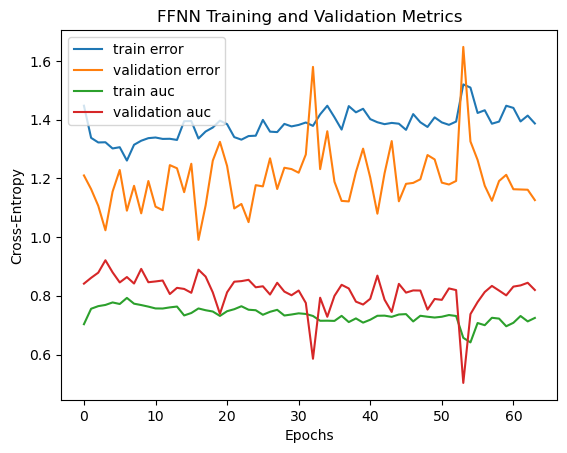

In [17]:


plt.figure()
plt.plot(history.history['loss'], label='train error')
plt.plot(history.history['val_loss'], label='validation error')
plt.plot(history.history['auc'], label='train auc')
plt.plot(history.history['val_auc'], label='validation auc')
plt.title('FFNN Training and Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [ ]:

data = np.load('../data/raw/fashion_test.npy')
X = data[:, :-1]
y = data[:, -1]

X = X / X.max(axis=0) # alongside rows, per column
# fill nans with zeros
X = np.nan_to_num(X)
y = tf.one_hot(indices=y, depth=NUMBER_OF_CLASSES).numpy()


results = model.evaluate(X, y, batch_size=32)

print('test results:', results)

In [10]:
model.save('../models/v0.01_reference_nn.keras')

# CNN

In [ ]:
from sklearn.model_selection import train_test_split
data = np.load('../data/raw/fashion_train.npy')
X = data[:, :-1]
y = data[:, -1]

X = X / X.max(axis=0) # alongside rows, per column
y = tf.one_hot(indices=y, depth=NUMBER_OF_CLASSES).numpy()


X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)
unique_labels = np.unique(y)
unique_labels

In [ ]:
X.shape

In [ ]:

# Define the neural network architecture
model = tf.keras.Sequential(
    [
        tf.keras.layers.Reshape((28, 28, 1), input_shape=(784,)),
        tf.keras.layers.Conv2D(
            16, kernel_size=3, strides=1, padding="same", activation="relu"
        ),
        tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(
            32, kernel_size=3, strides=1, padding="same", activation="relu"
        ),
        tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(5, activation="softmax"),
    ]
)

# Print model architecture
model.summary()

# Compile the model
# model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True), # stochastic gradient descent, but can specify batch size.
    loss='categorical_crossentropy',
    metrics=['AUC'],
)


# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=7,
    batch_size=32,
)
results = model.evaluate(X_val, y_val, batch_size=32)
import matplotlib.pyplot as plt

In [ ]:

plt.figure()
plt.plot(history.history['loss'], label='train error')
plt.plot(history.history['val_loss'], label='validation error')
plt.plot(history.history['auc'], label='train auc')
plt.plot(history.history['val_auc'], label='validation auc')
plt.title('CNN Training and Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

## Evaluation of CNN on the test set.

In [ ]:
data = np.load('../data/raw/fashion_test.npy')
X = data[:, :-1]
y = data[:, -1]

X = X / X.max(axis=0) # alongside rows, per column
# fill nans with zeros
X = np.nan_to_num(X)
y = tf.one_hot(indices=y, depth=NUMBER_OF_CLASSES).numpy()


results = model.evaluate(X, y, batch_size=32)

print('test results:', results)